<center><img src="car.jpg" width=500></center>


Insurance companies invest a lot of time and money into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

(`Source: https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf`) 

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [180]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit

# Start coding!

In [181]:
# Import csv as a df DataFrame
df = pd.read_csv('car_insurance.csv')
df.head(2)

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0


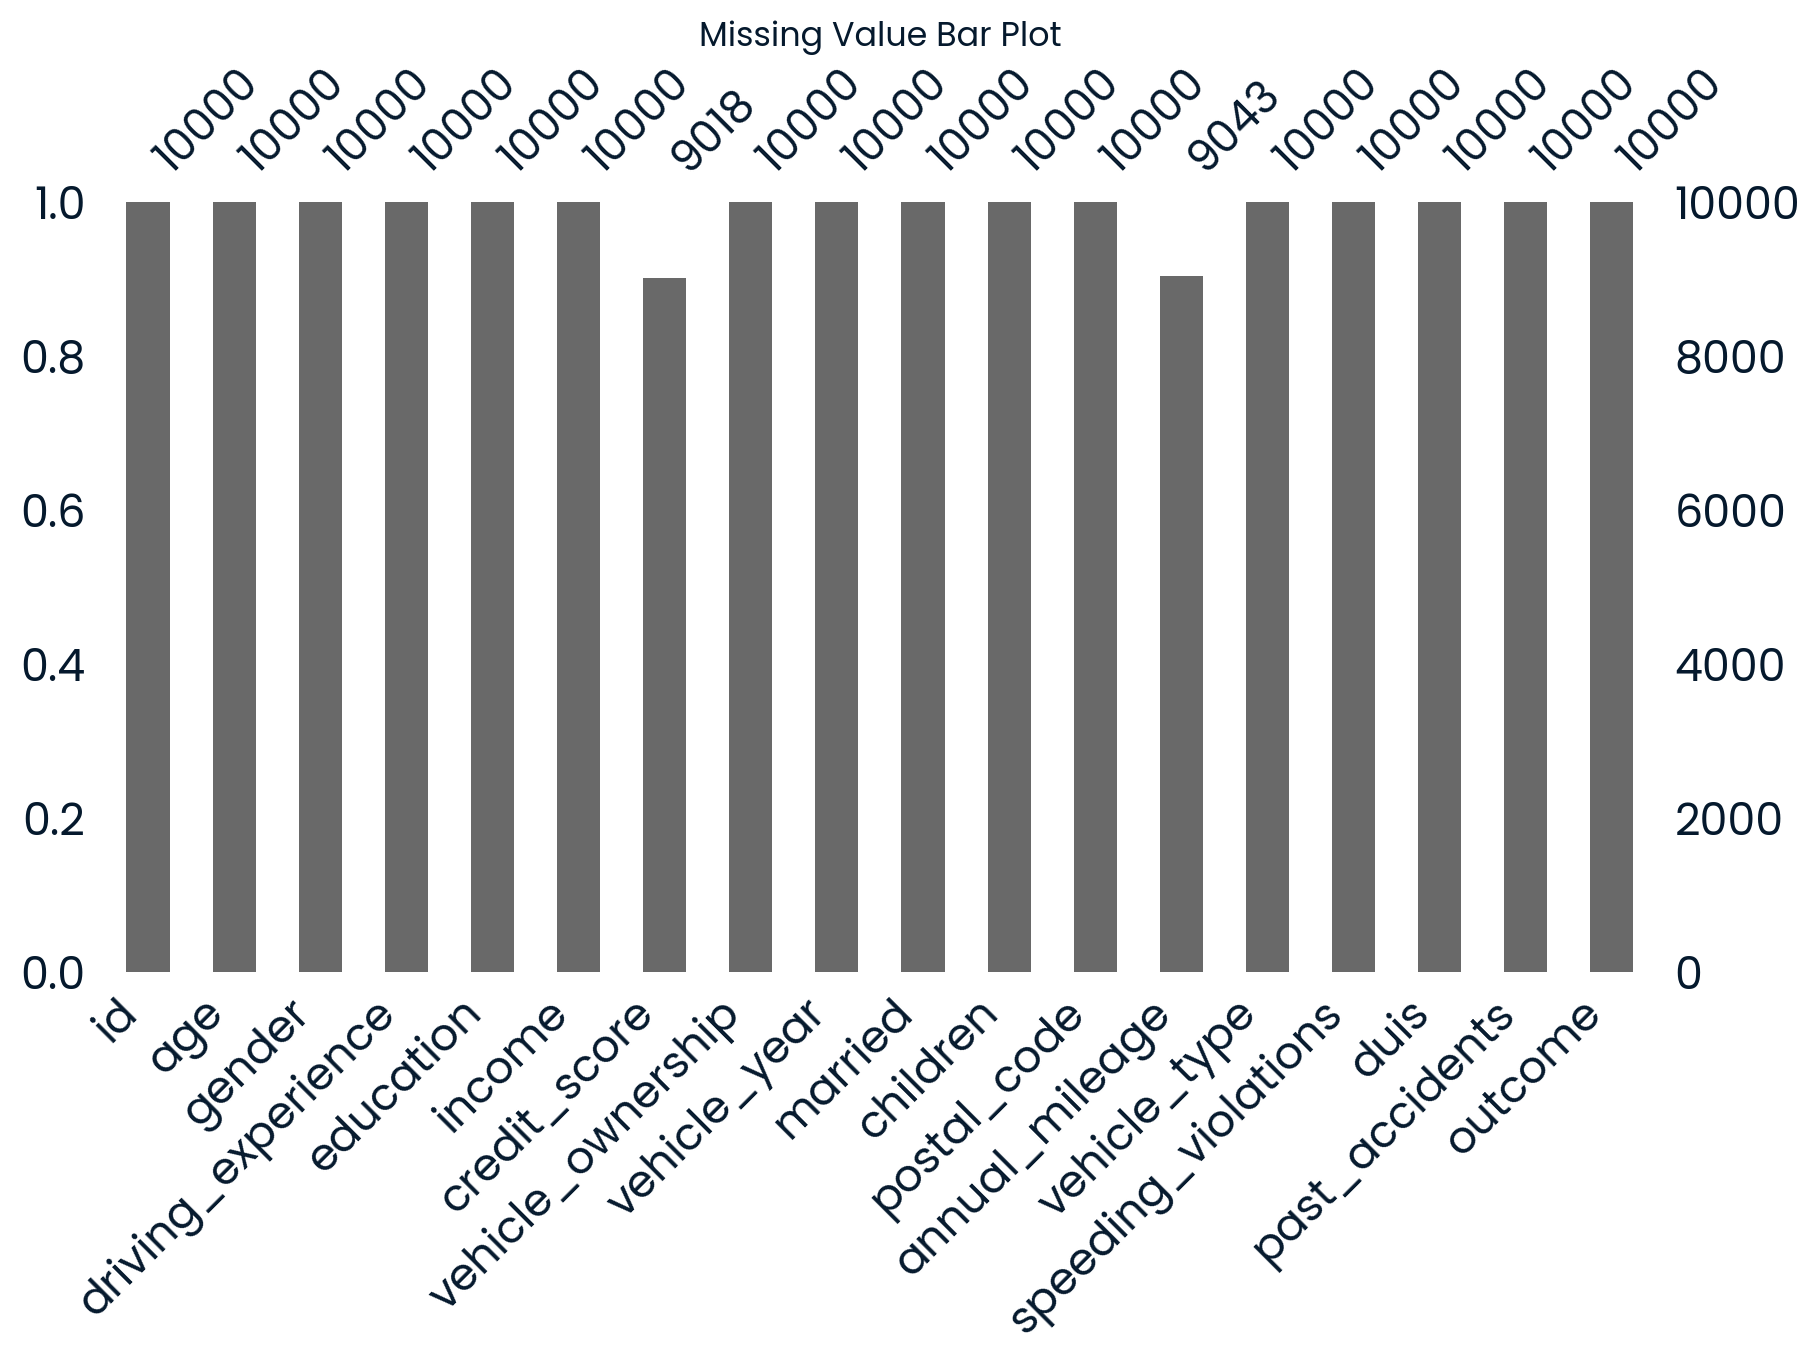

In [182]:
# check for missing values

import missingno as msno
import matplotlib.pyplot as plt

msno.bar(df, figsize=(10, 5))
plt.title("Missing Value Bar Plot")
plt.show()

In [183]:
# Create independent variables list excluding the "id" column
features = df.columns.tolist()
features_to_remove = ('id', 'outcome')
features = [f for f in features if f not in features_to_remove]

# Fit a model for each independent variable coupled with "outcome" then added to a list

models = []
for f in features:
    formula = 'outcome ~ ' + f
    if df.loc[:, f].isnull().sum() == 0:
        model = logit(formula, data=df).fit()
        models.append(model)
    else:
        model = logit(formula, data=df.dropna()).fit()
        models.append(model)

Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.566906
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
  

In [184]:
# Calculate a confusion matrix for each model

conf_matrices = []
for m in models:
    conf_matrices.append(m.pred_table())

# Define confusion matrix elements iloc

TN = (0, 0)
TP = (1, 1)
FN = (1, 0)
FP = (0, 1)

# Define a dataFrame that will contain features and corresponding model, accuracy, and confusion matrix

modelsdf = pd.DataFrame({'model': models, 'conf_matrix': conf_matrices})
modelsdf['feature'] = [
    [v.name() for v in model.model.data.design_info.factor_infos.keys() if v.name() != 'Intercept'][0]
    for model in modelsdf['model']
]

modelsdf['accuracy'] = modelsdf['conf_matrix'].apply(lambda cm: (cm[TN] + cm[TP])/(cm[TN] + cm[TP] + cm[FN] + cm[FP]))

sorted_modelsdf = modelsdf.sort_values(by='accuracy', ascending = False).reset_index(drop=True)
sorted_modelsdf = sorted_modelsdf[['feature', 'accuracy', 'conf_matrix', 'model']]

# Define best_feature_df

best_feature_df = pd.DataFrame({'best_feature': [sorted_modelsdf.loc[0, 'feature']], 
                               'best_accuracy': [sorted_modelsdf.loc[0, 'accuracy']]})
best_feature_df

,best_feature,best_accuracy
0,driving_experience,0.7771
